## PREDICTING FUTURE LINES/COORDINATES USING PROPHET 

In [1]:
#import libraries
import pandas as pd
import numpy as np


In [2]:
# file path
file_path ='/Users/macbookair/Downloads/DLSC shapes - Sheet3.csv'

In [3]:
# Reading the dataset
data = pd.read_csv(file_path)

In [4]:
# checking the size of the dataset
data.shape

(2160, 1)

In [5]:
# Viewing the top 5 of the data
data.head()

,sheet 1
0,0.07879
1,0.07878
2,0.07867
3,0.07846
4,0.07825


In [6]:
# Renaming the column of the dataset
data.rename(columns={'sheet 1': 'y'}, inplace=True)

In [7]:
# Confirming if it changed
data.head()

,y
0,0.07879
1,0.07878
2,0.07867
3,0.07846
4,0.07825


In [8]:
# Creating a date range for the data
data_range = pd.date_range(start='2020-01-01', periods = 2160, freq='D')

In [9]:
# adding the date range into the dataframe
data['ds'] = data_range

In [10]:
# Confirming if the dataset has date range for some rows
data.head(363)

,y,ds
0,0.07879,2020-01-01
1,0.07878,2020-01-02
2,0.07867,2020-01-03
3,0.07846,2020-01-04
4,0.07825,2020-01-05
...,...,...
358,0.07880,2020-12-24
359,0.07879,2020-12-25
360,0.27280,2020-12-26
361,0.27222,2020-12-27


In [11]:
# checking the size of the dataset
data.shape

(2160, 2)

In [12]:
# Rearranged the location of the columns
new_cols = ['ds', 'y']
data = data[new_cols]
data.head()

,ds,y
0,2020-01-01,0.07879
1,2020-01-02,0.07878
2,2020-01-03,0.07867
3,2020-01-04,0.07846
4,2020-01-05,0.07825


In [13]:
#printing the last 5 rows of the data
data.tail()

,ds,y
2155,2025-11-25,0.27225
2156,2025-11-26,0.27052
2157,2025-11-27,0.26881
2158,2025-11-28,0.26712
2159,2025-11-29,0.26525


### TIME SERIES FORECASTING

In [14]:
# Import prophet library
from prophet import Prophet

In [15]:
# Fitting the prophet with the dataset
m = Prophet()
m.fit(data)

17:03:49 - cmdstanpy - INFO - Chain [1] start processing
17:03:49 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Create the period or date you want
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2520,2026-11-25
2521,2026-11-26
2522,2026-11-27
2523,2026-11-28
2524,2026-11-29


In [17]:
# predicting the future points
forecast = m.predict(future)

# extracting the important columns  the yhat is the forecast, and the rest are clumns for components and uncertainty
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,0.193016,0.084576,0.296690
1,2020-01-02,0.192566,0.096130,0.294014
2,2020-01-03,0.191765,0.082087,0.298090
3,2020-01-04,0.190919,0.090913,0.294434
4,2020-01-05,0.189022,0.084834,0.292631


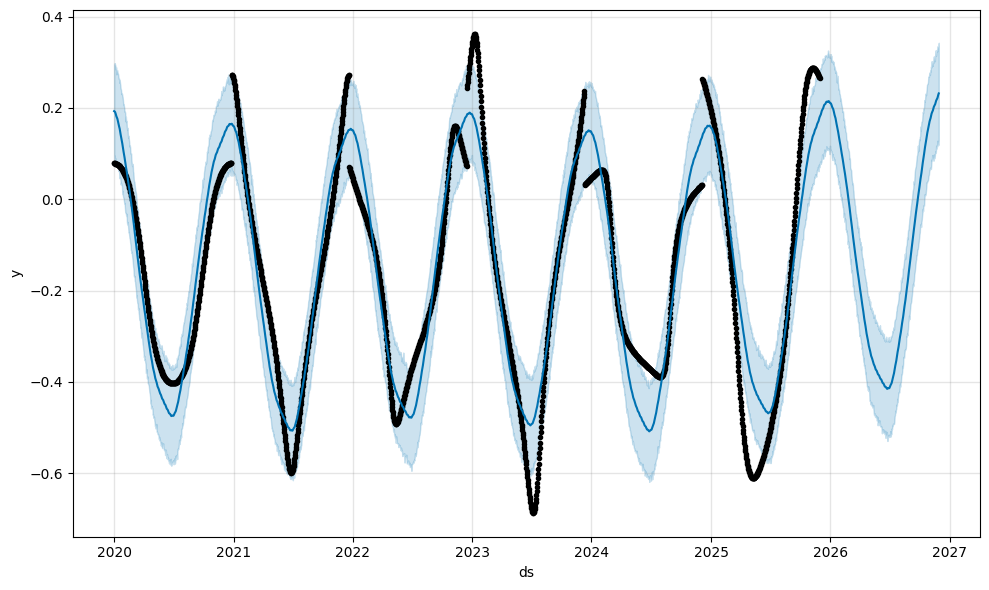

In [18]:
#Plotting the forecast
fig1 = m.plot(forecast)

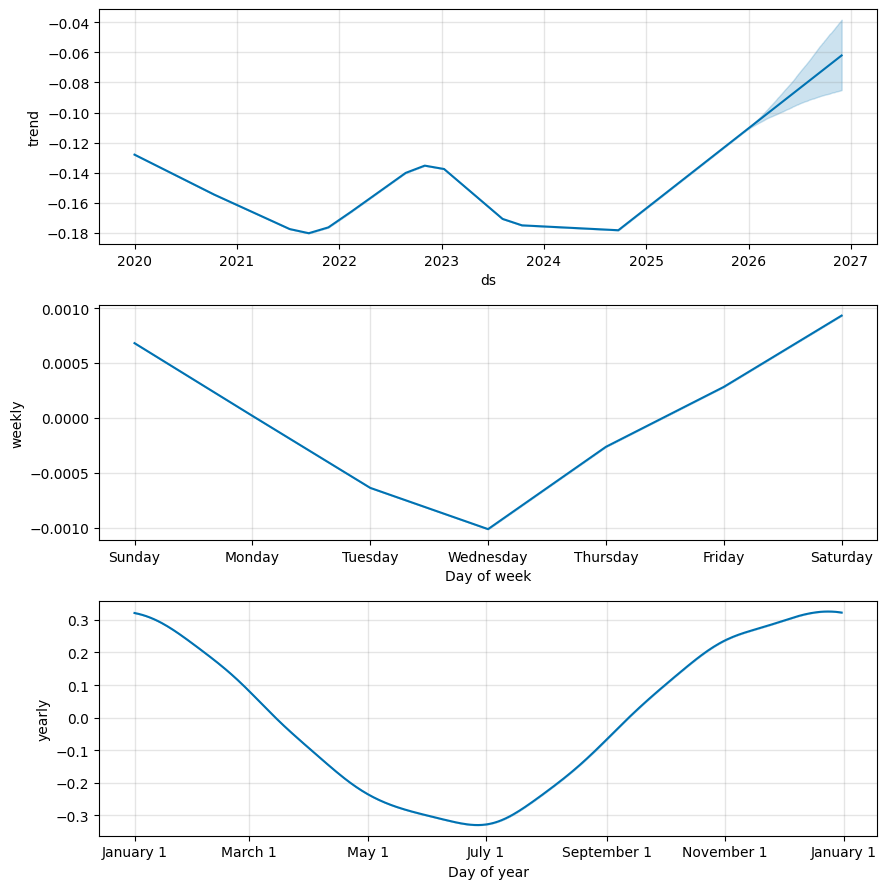

In [19]:
# Plotting for the forecast components
fig2 = m.plot_components(forecast)

In [20]:
# Plot for interactice charts
 
from prophet.plot import plot_plotly, plot_components_plotly 

In [21]:
plot_plotly(m, forecast)

/Users/macbookair/.pyenv/versions/3.11.4/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [22]:
# Extracting the coordinates needed
x_future = forecast[['ds', 'yhat']]

In [23]:
# print the top 5 rows
x_future.head()

,ds,yhat
0,2020-01-01,0.193016
1,2020-01-02,0.192566
2,2020-01-03,0.191765
3,2020-01-04,0.190919
4,2020-01-05,0.189022


In [24]:
# Filtering the data to show rows it predicted

x_filtered_df = x_future[x_future['ds'] > '2025-11-29']

#checking the size
x_filtered_df.shape

(365, 2)

In [25]:
#printing the top 5 rows
x_filtered_df.head()

,ds,yhat
2160,2025-11-30,0.181207
2161,2025-12-01,0.182640
2162,2025-12-02,0.184072
2163,2025-12-03,0.185771
2164,2025-12-04,0.188573


In [26]:
# Renaming the column name for easy identification
x_filtered_df.rename(columns={'yhat': 'x_coord'}, inplace=True)

/var/folders/0y/9xykymqn331_bmmdcljfdlyh0000gn/T/ipykernel_11678/1253255921.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#print top 5 rows
x_filtered_df.head()

,ds,x_coord
2160,2025-11-30,0.181207
2161,2025-12-01,0.182640
2162,2025-12-02,0.184072
2163,2025-12-03,0.185771
2164,2025-12-04,0.188573


## Y COORDINATES

In [28]:
# File path for the Y coordinates
file = '/Users/macbookair/Downloads/DLSC shapes - Sheet3 (1).csv'

In [29]:
# reading the dataset
y_data = pd.read_csv(file)

In [30]:
# priting the top 5 rows
y_data.head()

,sheet 1,sheet 2
0,0.07879,1.33586
1,0.07878,1.34007
2,0.07867,1.34427
3,0.07846,1.34847
4,0.07825,1.35267


In [31]:
# Dropping the X coordinate
y_data.drop('sheet 1',axis=1, inplace=True)

In [32]:
# Printing the top 5 rows
y_data.head()

,sheet 2
0,1.33586
1,1.34007
2,1.34427
3,1.34847
4,1.35267


In [33]:
# viewing the size of the shape
y_data.shape

(2160, 1)

In [34]:
# creating the date range it needs to create the date for, the frequency is set to daily so it increases with a day
y_date_range = pd.date_range(start = '2020-01-01', periods=2160, freq='D')
y_data['ds'] = y_date_range

In [35]:
#confirming if its added
y_data.head()

,sheet 2,ds
0,1.33586,2020-01-01
1,1.34007,2020-01-02
2,1.34427,2020-01-03
3,1.34847,2020-01-04
4,1.35267,2020-01-05


In [36]:
# renaming the column name because Prophet only identifies ds and y column
y_data.rename(columns ={'sheet 2': 'y'}, inplace=True)

In [37]:
# Reorganizing the columns
new_col = ['ds','y']
y_data = y_data[new_col]

In [38]:
# print the last 5 rows
y_data.tail()

,ds,y
2155,2025-11-25,1.29785
2156,2025-11-26,1.30560
2157,2025-11-27,1.31327
2158,2025-11-28,1.32087
2159,2025-11-29,1.32840


## Y  TIME SERIES FORECASTING

In [39]:
# Fitting the model
m = Prophet()
m.fit(y_data)

17:03:54 - cmdstanpy - INFO - Chain [1] start processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
# setting the number of days it needs to predict for (it is set to 365 so it can predict for 1 year)
y_future = m.make_future_dataframe(periods=365)
y_future.tail()

,ds
2520,2026-11-25
2521,2026-11-26
2522,2026-11-27
2523,2026-11-28
2524,2026-11-29


In [41]:
# predicting the future coordinates
y_forecast = m.predict(y_future)

# Printing the important columns
y_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,1.232871,1.162850,1.298306
1,2020-01-02,1.243238,1.172983,1.312547
2,2020-01-03,1.253509,1.194248,1.324548
3,2020-01-04,1.263654,1.196644,1.332619
4,2020-01-05,1.273244,1.205841,1.341883


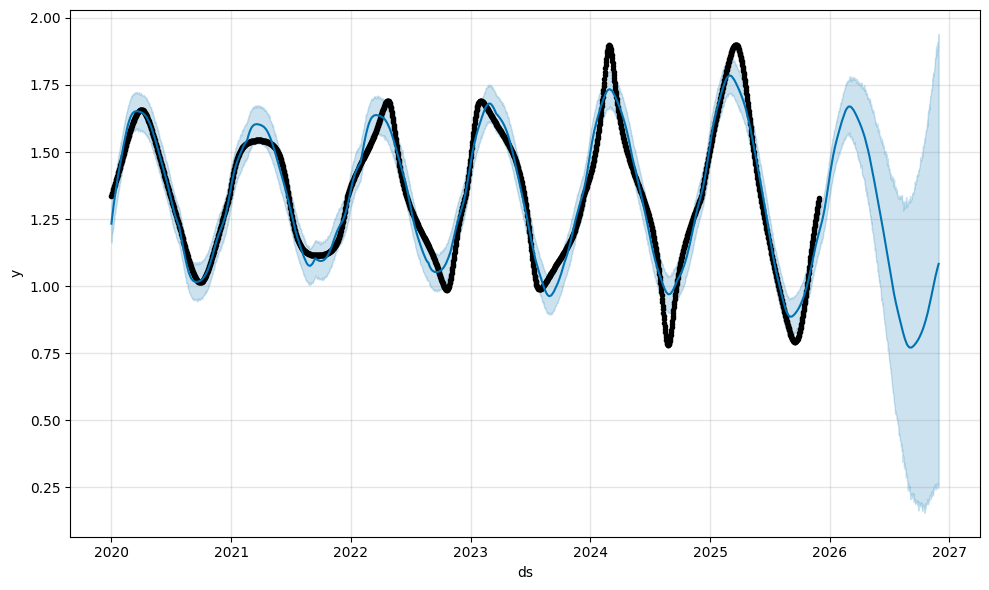

In [42]:
# Plotting the forecast
fig3 = m.plot(y_forecast)

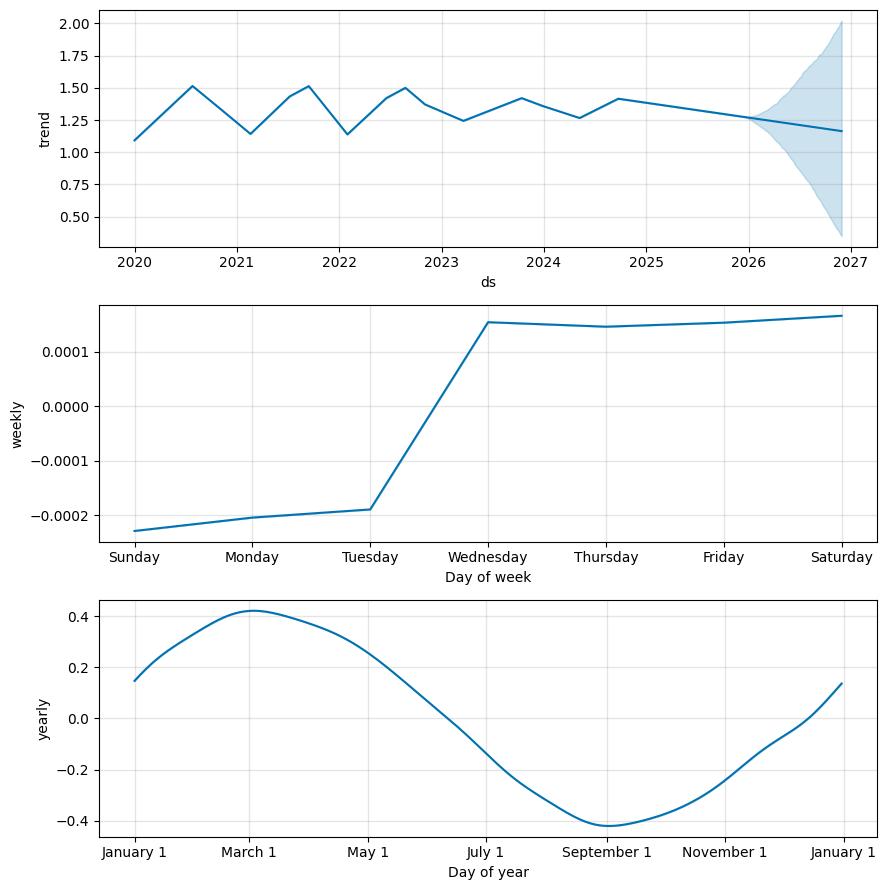

In [43]:
# Plotting the forecast components
fig4 = m.plot_components(y_forecast)

In [44]:
# plotting an interactive forecast and components
plot_plotly(m, y_forecast)

/Users/macbookair/.pyenv/versions/3.11.4/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [45]:
# Extracting the date and forecasted column
y_future = y_forecast[['ds', 'yhat']]

In [46]:
#printing the top 5 rows
y_future.head()

,ds,yhat
0,2020-01-01,1.232871
1,2020-01-02,1.243238
2,2020-01-03,1.253509
3,2020-01-04,1.263654
4,2020-01-05,1.273244


In [55]:
# Filtered the dataset to only show data for the predicted data
y_filtered_df = y_future[y_future['ds']> '2025-11-29']

# Confirming the size of the new data. we predicted for 365 days
if y_filtered_df.shape[0]== 365:
    print(y_filtered_df.shape[0])
    print("We are good to go")
else:
    print(y_filtered_df.shape[0])
    print("Output doesn't match the expected value")

365
We are good to go


In [ ]:
# Renaming the predicted column 
y_filtered_df.rename(columns={'yhat': 'y_coord'}, inplace=True)

/var/folders/0y/9xykymqn331_bmmdcljfdlyh0000gn/T/ipykernel_11678/1107375463.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Printing the top 5 rows
y_filtered_df.head()

,ds,y_coord
2160,2025-11-30,1.203910
2161,2025-12-01,1.208393
2162,2025-12-02,1.212877
2163,2025-12-03,1.217721
2164,2025-12-04,1.222268


In [ ]:
#merging the x_coordinates and y_coordinates using the data column
merged_df = pd.merge(x_filtered_df, y_filtered_df, on='ds', how ='inner')

In [ ]:
#print the toop 5 rows
merged_df.head()

,ds,x_coord,y_coord
0,2025-11-30,0.181207,1.203910
1,2025-12-01,0.182640,1.208393
2,2025-12-02,0.184072,1.212877
3,2025-12-03,0.185771,1.217721
4,2025-12-04,0.188573,1.222268


In [ ]:
# confirming the size of the predicted shape
merged_df.shape

(365, 3)

In [ ]:
# Saving the new dataframe into local machine
merged_df.to_csv('/Users/macbookair/workspace/DLSC /coord pred/PredictedCoordinates.csv')